<a href="https://colab.research.google.com/github/sams917/TravelAgent/blob/master/sleep_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne numpy tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 75.1 MB/s eta 0:00:00


In [ ]:
import os
import mne
from mne.datasets.sleep_physionet.age import fetch_data

drive_path = "/content/drive/My Drive/SleepEDF"

os.makedirs(drive_path, exist_ok=True)

subject_ids = list(range(0, 10))
recording = [1]

data = fetch_data(subjects=subject_ids, recording=recording, path=drive_path)

print(f"Saved {len(data)} PSG-Hypnogram file pairs to Google Drive.")


100%|█████████████████████████████████████| 48.3M/48.3M [00:00<00:00, 21.4GB/s]
100%|█████████████████████████████████████| 4.62k/4.62k [00:00<00:00, 3.24MB/s]
100%|█████████████████████████████████████| 51.1M/51.1M [00:00<00:00, 43.2GB/s]
100%|█████████████████████████████████████| 3.90k/3.90k [00:00<00:00, 2.19MB/s]
100%|█████████████████████████████████████| 51.1M/51.1M [00:00<00:00, 35.0GB/s]
100%|█████████████████████████████████████| 4.80k/4.80k [00:00<00:00, 2.59MB/s]
100%|█████████████████████████████████████| 51.4M/51.4M [00:00<00:00, 48.8GB/s]
100%|█████████████████████████████████████| 3.70k/3.70k [00:00<00:00, 2.98MB/s]
100%|█████████████████████████████████████| 46.9M/46.9M [00:00<00:00, 35.1GB/s]
100%|█████████████████████████████████████| 4.83k/4.83k [00:00<00:00, 5.86MB/s]
100%|█████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 36.3GB/s]
100%|█████████████████████████████████████| 3.98k/3.98k [00:00<00:00, 4.48MB/s]
100%|███████████████████████████████████

Download complete in 18m50s (478.0 MB)
Saved 10 PSG-Hypnogram file pairs to Google Drive.


In [ ]:
import os
import mne
import numpy as np
from glob import glob
import re

input_dir = "/content/drive/MyDrive/SleepEDF/physionet-sleep-data"

# Gather all EDF files
psg_files = sorted(glob(os.path.join(input_dir, "*-PSG.edf")))
hypnogram_files = sorted(glob(os.path.join(input_dir, "*-Hypnogram.edf")))

# Function to extract subject ID (e.g., 4001) from filename
def extract_subject_id(filename):
    match = re.search(r"SC(\d{4})", filename)
    return match.group(1) if match else None

# Create dicts for matching
psg_dict = {extract_subject_id(f): f for f in psg_files}
hyp_dict = {extract_subject_id(f): f for f in hypnogram_files}

# Match subjects
paired = []
for sid in sorted(psg_dict.keys()):
    if sid in hyp_dict:
        paired.append((psg_dict[sid], hyp_dict[sid]))

print(f"✅ Found {len(paired)} subject pairs")

# Process each subject and store in memory
processed_subjects = []

for i, (psg_file, hypnogram_file) in enumerate(paired):
    try:
        raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)

        try:
            raw.pick_channels(['EEG Fpz-Cz', 'EEG Pz-Oz'])
        except Exception:
            raw.pick_channels(['EEG Fpz-Cz'])

        raw.filter(l_freq=0.3, h_freq=35.0)

        raw._data = (raw._data - np.mean(raw._data, axis=1, keepdims=True)) / np.std(raw._data, axis=1, keepdims=True)

        # Set sleep stage annotations
        annotations = mne.read_annotations(hypnogram_file)
        raw.set_annotations(annotations)

        # Store in memory
        processed_subjects.append({
            "id": i,
            "subject_id": extract_subject_id(psg_file),
            "raw": raw
        })

        print(f"✅ Processed subject {i} (ID: {extract_subject_id(psg_file)})")

    except Exception as e:
        print(f"⚠️ Skipped subject {i}: {e}")





✅ Found 10 subject pairs


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 0 (ID: 4001)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 1 (ID: 4011)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 2 (ID: 4021)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 3 (ID: 4031)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 4 (ID: 4041)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 5 (ID: 4051)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 6 (ID: 4061)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 7 (ID: 4071)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s finished
/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


✅ Processed subject 8 (ID: 4081)


/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/tmp/ipython-input-3-4050324593.py:36: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished


✅ Processed subject 9 (ID: 4091)


/tmp/ipython-input-3-4050324593.py:51: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


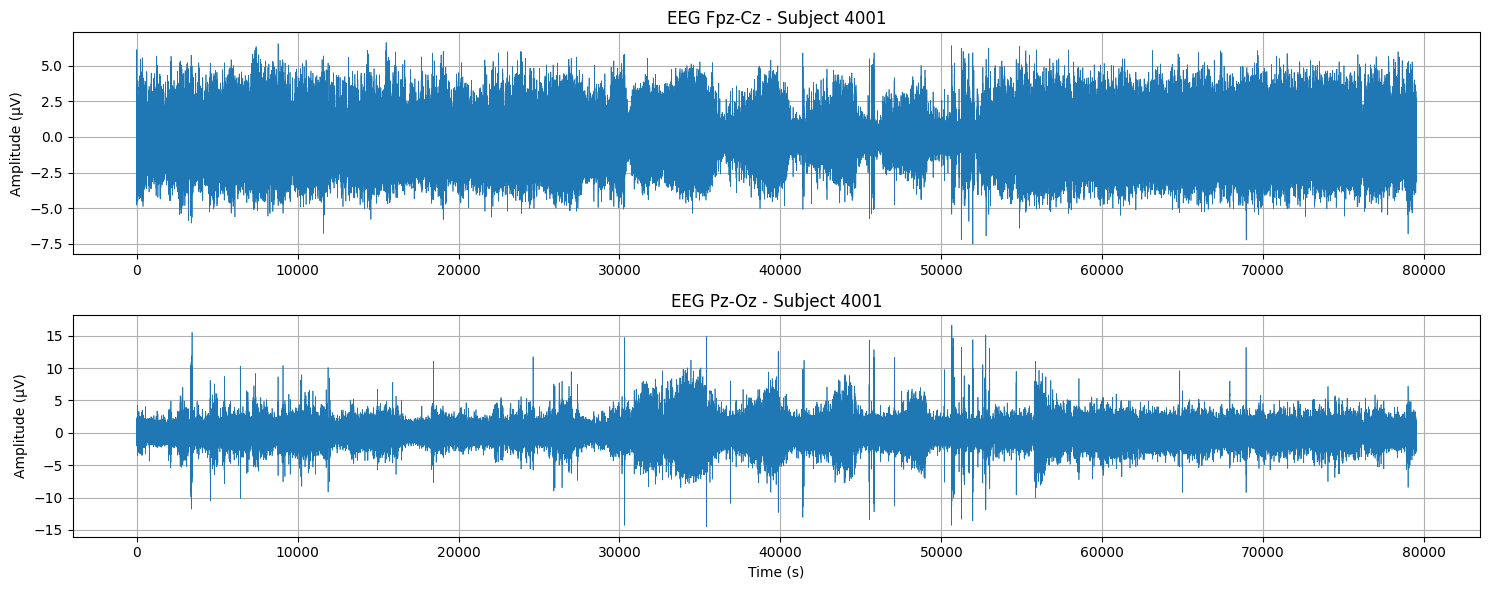

In [ ]:
import matplotlib.pyplot as plt

# Choose subject
subject_index = 0
subject = processed_subjects[subject_index]
raw = subject['raw']
subject_id = subject['subject_id']

channel_names = raw.info['ch_names']

data, times = raw[:, :]

plt.figure(figsize=(15, 6))

for i, ch_name in enumerate(channel_names):
    plt.subplot(len(channel_names), 1, i + 1)
    plt.plot(times, data[i], label=ch_name, linewidth=0.5)
    plt.ylabel("Amplitude (µV)")
    plt.title(f"{ch_name} - Subject {subject_id}")
    plt.grid(True)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()




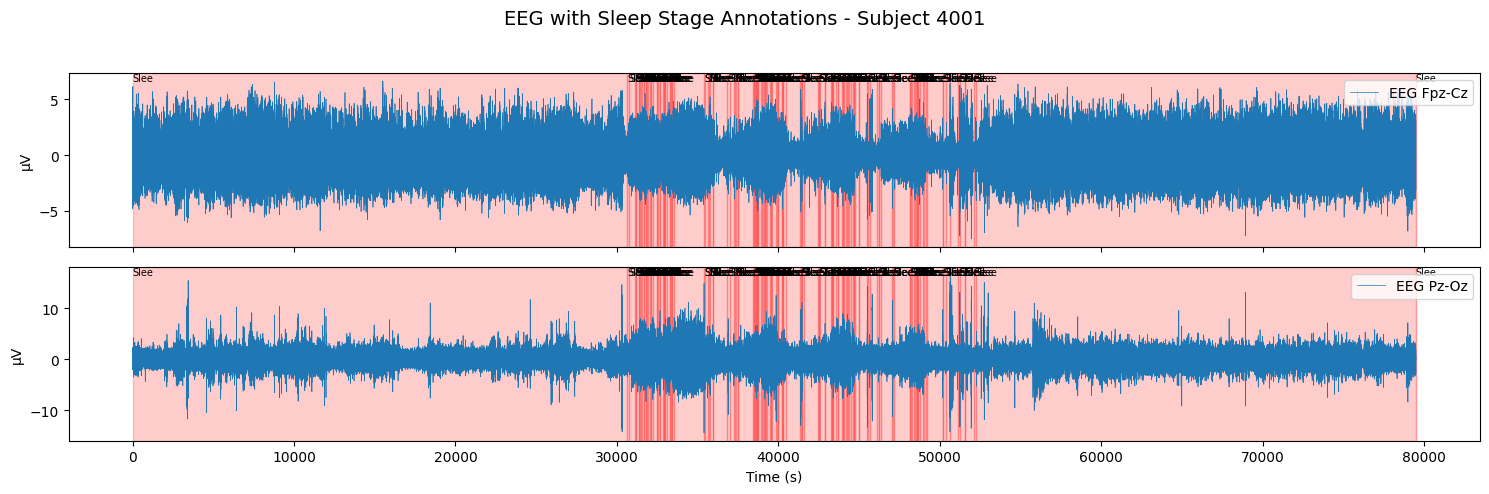

In [ ]:
import matplotlib.pyplot as plt

data, times = raw.get_data(return_times=True)

annotations = raw.annotations

# Convert annotations to array for plotting
annot_onsets = annotations.onset
annot_durations = annotations.duration
annot_descriptions = annotations.description

# Plot EEG data with annotation bands
fig, ax = plt.subplots(len(data), 1, figsize=(15, 5), sharex=True)

for i, ch_data in enumerate(data):
    ax[i].plot(times, ch_data, label=raw.ch_names[i], linewidth=0.5)
    ax[i].set_ylabel('µV')
    ax[i].legend(loc='upper right')
    for onset, dur, desc in zip(annot_onsets, annot_durations, annot_descriptions):
        ax[i].axvspan(onset, onset+dur, color='red', alpha=0.2)
        ax[i].text(onset, np.max(ch_data), desc[:4], color='black', fontsize=7)

plt.xlabel("Time (s)")
plt.suptitle(f"EEG with Sleep Stage Annotations - Subject {subject['subject_id']}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




In [ ]:
from mne import Epochs, events_from_annotations

# Parameters
epoch_length = 30  # seconds
sfreq = 100        # target sampling freq

X_all = []
y_all = []

# Sleep stage label mapping
stage_map = {
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,  # Combine S3 and S4
    "Sleep stage R": 4,
}


allowed_stages = [0, 1, 2, 3, 4]

for subject in processed_subjects:
    raw = subject["raw"]

    # Resample for uniform sampling rate
    raw.resample(sfreq)

    # Convert annotations to events
    events, _ = events_from_annotations(raw, event_id=stage_map)

    # Epoch the data into 30s windows
    tmax = epoch_length - 1.0 / sfreq  # inclusive endpoint
    epochs = Epochs(raw, events, event_id=stage_map, tmin=0, tmax=tmax,
                    baseline=None, detrend=1, preload=True, verbose=False)

    # Extract data and corresponding labels
    data = epochs.get_data()              # shape: (n_epochs, n_channels, n_times)
    labels = epochs.events[:, -1]         # stage label for each epoch

    # Optional filtering by allowed stages
    mask = np.isin(labels, allowed_stages)
    data = data[mask]
    labels = labels[mask]

    X_all.append(data)
    y_all.append(labels)

# Merge across all subjects
X_all = np.concatenate(X_all, axis=0)
y_all = np.concatenate(y_all, axis=0)

print(f"✅ Final shape: {X_all.shape}, Labels: {y_all.shape}")


Sampling frequency of the instance is already 100.0, returning unmodified.
Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
Sampling frequency of the instance is already 100.0, returning unmodified.
Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
Sampling frequency of the instance is already 100.0, returning unmodified.
Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
Sampling frequency of the instance is already 100.0, returning unmodified.
Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), 

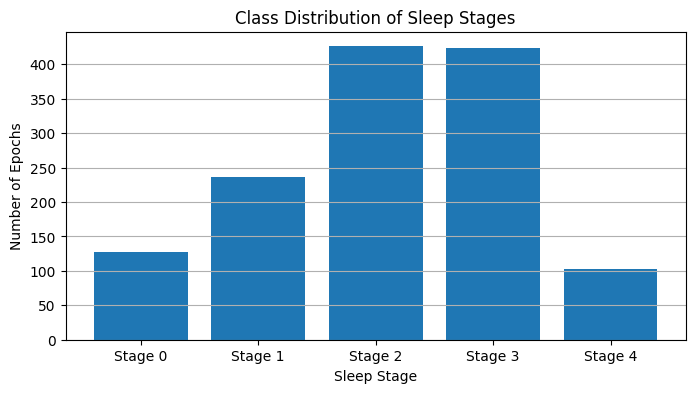

In [ ]:
import matplotlib.pyplot as plt
import collections

# Count each class label
label_counts = collections.Counter(y_all)
classes = list(label_counts.keys())
counts = list(label_counts.values())

# Plot
plt.figure(figsize=(8, 4))
plt.bar(classes, counts, tick_label=[f"Stage {i}" for i in classes])
plt.xlabel("Sleep Stage")
plt.ylabel("Number of Epochs")
plt.title("Class Distribution of Sleep Stages")
plt.grid(True, axis='y')
plt.show()



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Bidirectional, LSTM, GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout, Dense, SpatialDropout1D, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Original: (samples, channels, time_steps) -> Need: (samples, time_steps, channels)
X_all = X_all.transpose(0, 2, 1)


y_cat = to_categorical(y_all, num_classes=5)


X_train, X_val, y_train, y_val = train_test_split(X_all, y_cat, test_size=0.2, random_state=42)


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_all), y=y_all)
class_weight_dict = dict(enumerate(class_weights))

model = Sequential()

model.add(Conv1D(64, kernel_size=7, padding='same', kernel_regularizer=l2(1e-4), input_shape=(X_all.shape[1], X_all.shape[2])))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(0.3))

model.add(Conv1D(128, kernel_size=5, padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(0.3))

model.add(Conv1D(256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh')))

model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3000, 64)       │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3000, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 3000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1500, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 1500, 64)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1500, 128)      │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1500, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1500, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 750, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 750, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 750, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 750, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 750, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 750, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 750, 128)       │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,909 (1.24 MB)

 Trainable params: 323,013 (1.23 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.3011 - loss: 1.4853 - val_accuracy: 0.3270 - val_loss: 1.4882
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.4846 - loss: 1.2364 - val_accuracy: 0.3612 - val_loss: 1.4613
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.4731 - loss: 1.1311 - val_accuracy: 0.4411 - val_loss: 1.5761
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.5090 - loss: 1.1093 - val_accuracy: 0.5057 - val_loss: 1.6350
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.5233 - loss: 1.1013 - val_accuracy: 0.4981 - val_loss: 1.4139
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.5309 - loss: 0.9810 - val_accuracy: 0.5323 - val_loss: 1.3359
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.5184 - loss: 0.9923 - val_accuracy: 0.4677 - val_loss: 1.3988
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.5595 - loss: 0.9618 - val_accuracy: 0.4981 - v

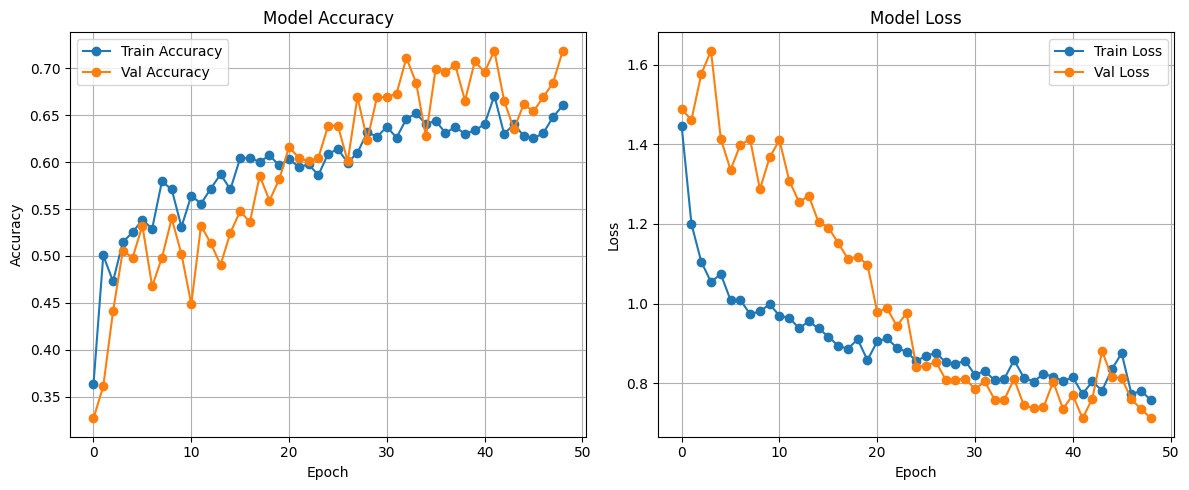

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 973ms/step


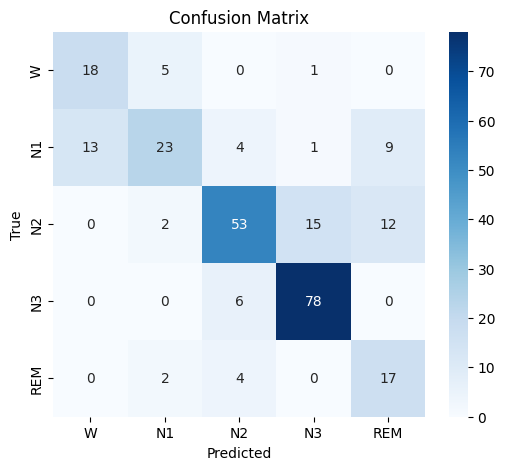


📋 Classification Report:
              precision    recall  f1-score   support

           W       0.58      0.75      0.65        24
          N1       0.72      0.46      0.56        50
          N2       0.79      0.65      0.71        82
          N3       0.82      0.93      0.87        84
         REM       0.45      0.74      0.56        23

    accuracy                           0.72       263
   macro avg       0.67      0.70      0.67       263
weighted avg       0.74      0.72      0.72       263



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Step 2: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Optional: Sleep stage labels
labels = ["W", "N1", "N2", "N3", "REM"]

# Step 3: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 4: Print classification report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


In [ ]:
model.save('sleep_stage_model.h5')

print("✅ Model saved as 'sleep_stage_model.h5'")


✅ Model saved as 'sleep_stage_model.h5'


In [ ]:
import shutil

drive_path = '/content/drive/MyDrive/sleep_stage_model.h5'

shutil.copy('sleep_stage_model.h5', drive_path)

print(f"✅ Model copied to Google Drive: {drive_path}")


✅ Model copied to Google Drive: /content/drive/MyDrive/sleep_stage_model.h5
